## Pandas built in colormaps

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('')

In [ ]:
df.plot.areas(alpha=0.4)   
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [ ]:
df.plot.line()

In [ ]:
df.plot.scatter(x='A', y='B', c='C', cmap='coolwarm', s=df['D']*100)

In [ ]:
df.plot.hexbin(x='A', y='B', gridsize=25, cmap='coolwarm')

In [ ]:
df.plot.density()

## Matplotlib collor maps

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Have colormaps separated into categories:
# http://matplotlib.org/examples/color/colormaps_reference.html
cmaps = [('Perceptually Uniform Sequential', [
            'viridis', 'plasma', 'inferno', 'magma']),
         ('Sequential', [
            'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']),
         ('Sequential (2)', [
            'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink',
            'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia',
            'hot', 'afmhot', 'gist_heat', 'copper']),
         ('Diverging', [
            'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
            'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']),
         ('Qualitative', [
            'Pastel1', 'Pastel2', 'Paired', 'Accent',
            'Dark2', 'Set1', 'Set2', 'Set3',
            'tab10', 'tab20', 'tab20b', 'tab20c']),
         ('Miscellaneous', [
            'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
            'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg', 'hsv',
            'gist_rainbow', 'rainbow', 'jet', 'nipy_spectral', 'gist_ncar'])]


nrows = max(len(cmap_list) for cmap_category, cmap_list in cmaps)
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(cmap_category, cmap_list, nrows):
    fig, axes = plt.subplots(nrows=nrows)
    fig.subplots_adjust(top=0.95, bottom=0.01, left=0.2, right=0.99)
    axes[0].set_title(cmap_category + ' colormaps', fontsize=14)

    for ax, name in zip(axes, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(name))
        pos = list(ax.get_position().bounds)
        x_text = pos[0] - 0.01
        y_text = pos[1] + pos[3]/2.
        fig.text(x_text, y_text, name, va='center', ha='right', fontsize=10)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axes:
        ax.set_axis_off()


for cmap_category, cmap_list in cmaps:
    plot_color_gradients(cmap_category, cmap_list, nrows)

plt.show()

## Serialiszing colormaps and use for plotting

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)

# length of artificial time series
n_obs = 1000

# number of different assets
n_assets = 4

# sample Nx4 data series matrix
artificial_returns = np.random.randn(n_obs, n_assets) + 0.05
artificial_returns

array([[ 1.67434536, -0.56175641, -0.47817175, -1.02296862],
       [ 0.91540763, -2.2515387 ,  1.79481176, -0.7112069 ],
       [ 0.3690391 , -0.19937038,  1.51210794, -2.01014071],
       ..., 
       [ 0.12341633,  0.46602616, -1.82920004,  0.62545885],
       [ 0.15206241,  1.23430372, -0.74484305, -0.07590305],
       [-0.9103464 , -0.79391327,  0.67834172,  0.58721449]])

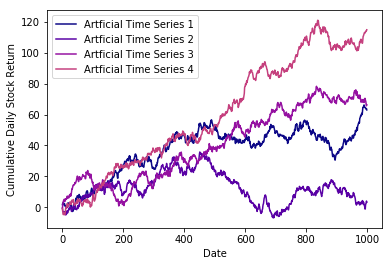

In [5]:
# get colormap
colors = plt.cm.plasma(np.linspace(0,3,20))

# plot cumulative sums
for i in range(artificial_returns.shape[1]):
    plt.plot(artificial_returns.T[i].cumsum(), color=colors[i], label='Artficial Time Series {}'.format(i + 1));
plt.legend(loc='best');
plt.xlabel('Date');
plt.ylabel('Cumulative Daily Stock Return');
plt.show()